In [150]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns  # to plot the heat maps

In [151]:
# drop the filename column
x = pd.read_csv("final_audio_data.csv")
x.drop(['index', 'Artist Name', 'Artist_id', 'Track Name', 'Track ID'], axis=1, inplace=True)
# drop and save the labels of each entry
y = x.pop('Genre')

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [153]:
scalar = StandardScaler()
x_train = pd.DataFrame(scalar.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scalar.transform(x_test), columns=x_test.columns)

<AxesSubplot:>

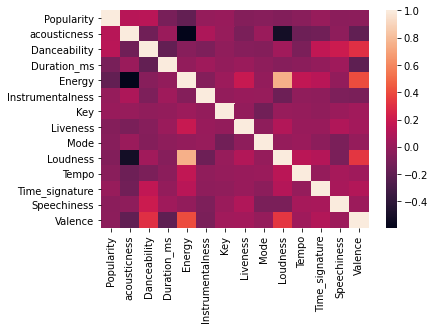

In [154]:
sns.heatmap(x_train.corr())

In [155]:
print(f"shape before feature reduction: {x_train.shape}")
pca = PCA(13)

x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))
print(f"shape after feature reduction: {x_train.shape}")
x_train

shape before feature reduction: (4624, 14)
shape after feature reduction: (4624, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.839704,-0.034177,0.578113,-0.348754,0.600375,1.300315,0.052195,-0.907703,-1.545450,0.335545,-0.212835,-0.931936,0.065228
1,-1.046442,-0.178014,1.539333,0.289593,0.041940,0.628563,0.180425,-0.213943,0.260795,-0.512418,0.370483,-0.465327,0.517099
2,-1.945988,1.141903,-0.671065,0.810075,1.211270,-0.677533,-0.283111,1.785394,-0.837178,-0.230765,0.148667,0.109175,0.252942
3,2.917373,1.050744,-0.656930,-0.871876,-0.016283,0.300110,0.118485,-1.653063,-1.107607,-0.528757,0.931108,0.471011,-0.931933
4,-2.151486,0.300016,0.404660,-0.524631,0.730514,0.939605,0.213984,0.362246,-0.717829,0.431843,0.737657,-0.139219,0.503810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,1.012917,-0.593354,0.411299,0.278106,-0.597135,-0.739999,0.163840,0.491510,0.872626,-1.068483,-0.402818,-1.157021,0.889307
4620,0.514908,-1.330335,-1.548487,0.774338,1.744684,0.203678,-1.485393,-0.788867,-1.129383,0.142858,-1.744076,-0.128142,-0.309606
4621,-1.015405,1.937889,0.580775,0.094669,0.964927,-1.267680,-1.032084,0.336952,-0.723340,1.220973,0.683723,-0.091504,0.464921
4622,-0.820296,-0.026025,1.729401,-0.200156,-0.725471,0.055476,0.388979,-0.070161,0.730765,-0.331268,0.175325,-1.605200,-0.213377


<AxesSubplot:>

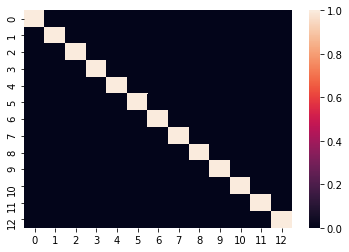

In [156]:
sns.heatmap(x_train.corr())

In [160]:
classfier = RandomForestClassifier()
classfier.fit(x_train, y_train)

y_pred = classfier.predict(x_test)
print(f"Accuraccy: {accuracy_score(y_test, y_pred)}")

Accuraccy: 0.5280898876404494
